In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif, f_classif, chi2, RFE

In [3]:
df1 = pd.read_csv('listings.csv')
df2 = pd.read_csv('reviews2.csv')
df3 = pd.read_csv('calendar2.csv')


/Users/dh/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df1.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1947,https://www.airbnb.com/rooms/1947,20200318205803,2020-03-18,Furnished Gold Coast studio #806,Cozy studio apartment in vintage renovated co...,This is a perfect apartment and location for a...,Cozy studio apartment in vintage renovated co...,none,This location is so convenient. You can walk t...,...,f,f,moderate,f,f,8,8,0,0,0.05
1,2384,https://www.airbnb.com/rooms/2384,20200318205803,2020-03-19,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.81
2,4505,https://www.airbnb.com/rooms/4505,20200318205803,2020-03-18,Chicago's 1st AirBnB! Check out new Winter rates!,"We took the winter off, made things nicer arou...","We travel a lot, we know what people need. We...","We took the winter off, made things nicer arou...",none,NaN,...,t,f,moderate,f,f,1,1,0,0,2.93
3,7126,https://www.airbnb.com/rooms/7126,20200318205803,2020-03-18,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhood.,This is a very small studio apartment with a ...,A very small studio in a wonderful neighborhoo...,none,"Ukrainian Village was just named ""Hottest Neig...",...,f,f,moderate,f,f,1,1,0,0,2.94
4,9811,https://www.airbnb.com/rooms/9811,20200318205803,2020-03-18,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,"This lovely one bedroom ""hideaway"" is located ...",One-bedroom hideaway tucked into Old Town step...,none,Chicago’s Old Town neighborhood is squeezed be...,...,t,f,strict_14_with_grace_period,f,f,11,11,0,0,0.68


In [5]:
df2.head()

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments
0,166100,16403976,503161230,2019-08-05,13546968,Vanessa,"perfect location, literally steps off the blue..."
1,57162,6057908,503775558,2019-08-06,165240603,Cory,Very helpful and friendly host. Great location...
2,230805,21980644,423579304,2019-03-14,162271002,Mathieu,John's place is awesome ! It's located at 15mi...
3,38998,3585870,435529807,2019-04-10,13155606,Patrick,Decent spot to lay your head down.
4,193325,19123858,251251873,2018-04-07,30877474,Erin,Great place to stay if you’re out all day. Gro...


In [6]:
df3.head()

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1050306,23091493,2020-10-04,f,$97.00,$97.00,2.0,7.0
1,2593572,39395408,2020-03-18,f,$45.00,$45.00,3.0,365.0
2,1628205,30088902,2020-04-19,t,$100.00,$100.00,1.0,1125.0
3,360945,9759854,2020-08-09,t,$42.00,$42.00,2.0,1125.0
4,2865876,40966015,2021-01-05,f,$71.00,$71.00,1.0,1125.0


In [7]:
df_listings = df1.copy()
df_reviews = df2.copy()
df_cal = df3.copy()


In [8]:
df_listings.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

# Following the CRISP-DM Method:

- 1) Business understanding
- 2) Data understanding
- 3) Data preparation
- 4) Modeling
- 5) Evaluation

# Business Insight questions:
- 1) Does an increased price of a listing mean better reviews?
- 2) What time of the year do prices spike up?
- 3) How long do guests typically stay in an Airbnb?
- 4) What characteristics do higher priced homes have?

# Business Understanding

Airbnb's goal is to drive revenue. Thus, if they can see what features are important to drive revnue, they can increase their profit. I will first take a look at the data and see what features need to be cleaned and which ones need to be removed. 

# Data Understanding

What needs to be cleaned?

### df_listings

- After seeing the datatypes above, some binary catergorical features can actually be transformed into numerical ones. For example the 'available', 'instant_bookable', 'is_business_travel_ready', 'host_is_superhost', host_has_profile_pic	host_identity_verified, has_availability columns. 
- the 'price' column shouldn't be an object, it should be a float.


- We can also remove any columns that are irrelevant to what we are trying to find: listing_url, scrape_id, last_scaped, thumbnail_url,	medium_url,	picture_url,	xl_picture_url,	host_id,	host_url,	host_name,	host_since,	host_location,	host_about,	host_thumbnail_url,	host_picture_url,	calculated_host_listings_count,	calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms,	calculated_host_listings_count_shared_rooms, host_listings_count,	host_total_listings_count,	host_verifications, host_neighbourhood, neighbourhood, neighbourhood_group_cleansed, city,	state,	zipcode,	market,	smart_location,	country_code	country	latitude	longitude	is_location_exact, property_type,	requires_license	license	jurisdiction_names, review_scores_accuracy,	review_scores_cleanliness,	review_scores_checkin,	review_scores_communication,	review_scores_location,	review_scores_value, first_review,	last_review, calendar_last_scraped, calendar_updated


### df_cal

- the 'available' column has to be converted to either a boolean or binary column
- Since we only has two rows that have missing values, we can remove them
- the 'price' and 'adjusted_price' columns shouldn't be an object, it should be a float.
- minimum and maximum nights shouldn't be a float, since nights are discrete, we can convert these to int


### df_reviews
- there are 281 missings reviews out of 365135 reviews so we can remove any empty reviews since they only represent 0.07% of the 'comments' column and we need this information from the df.

In [9]:
df_cal.dtypes

Unnamed: 0          int64
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [10]:
#Check missing
df_cal.isna().sum()


Unnamed: 0        0
listing_id        0
date              0
available         0
price             0
adjusted_price    0
minimum_nights    1
maximum_nights    1
dtype: int64

In [11]:
df_reviews.dtypes

Unnamed: 0        int64
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object

In [12]:
df_reviews.isna().sum()

Unnamed: 0         0
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         154
dtype: int64

In [13]:
df_reviews.shape

(182568, 7)

In [14]:
with pd.option_context('display.max_columns', None):
    display(df_listings)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1947,https://www.airbnb.com/rooms/1947,20200318205803,2020-03-18,Furnished Gold Coast studio #806,Cozy studio apartment in vintage renovated co...,This is a perfect apartment and location for a...,Cozy studio apartment in vintage renovated co...,none,This location is so convenient. You can walk t...,The building office does not manage this apart...,You're steps away from the red line train and ...,Once you arrive it's like living in your own a...,I live in Indiana and don't always see my gues...,"This is a residential condo building, so I wou...",NaN,NaN,https://a0.muscache.com/im/pictures/40d375a8-5...,NaN,2153,https://www.airbnb.com/users/show/2153,Linda,2008-08-16,"Munster, Indiana, United States",I'm a former university administrator who saw ...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/3c130...,https://a0.muscache.com/im/pictures/user/3c130...,River North,4.0,4.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Chicago, IL, United States",Near North Side,Near North Side,NaN,Chicago,IL,60610,Chicago,"Chicago, IL",US,United States,41.902460,-87.634050,t,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",NaN,$48.00,$500.00,NaN,$100.00,$0.00,1,$0.00,28,60,18,28,60,60,27.5,60.0,2 days ago,t,13,43,65,65,2020-03-18,3,1,2015-03-01,2020-01-01,90.0,10.0,9.0,10.0,10.0,10.0,9.0,t,R18000024411,"{""Illinois State"","" Cook County"","" IL"","" CHICA...",f,f,moderate,f,f,8,8,0,0,0.05
1,2384,https://www.airbnb.com/rooms/2384,20200318205803,2020-03-19,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,The basement laundry room hours are 8:00am to ...,UNIVERSITY OF CHICAGO: Visiting academics and ...,You will have access to the entire apartment -...,I will greet you when you arrive and show you ...,1. Your booking is for ONE (1) person only - t...,NaN,NaN,https://a0.muscache.com/im/pictures/acf6b3c0-4...,NaN,2613,https://www.airbnb.com/users/show/2613,Rebecca,2008-08-29,"Chicago, Illinois, United States",My 2 bdrm apartment is a 2nd floor walk-u

In [15]:
#find the highest priced airbnb
df_cal[df_cal['price']==df_cal['price'].max()]


,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
611,1893078,33159486,2021-01-15,t,$999.00,$999.00,27.0,1125.0
882,1912900,33364232,2020-10-19,t,$999.00,$999.00,2.0,1125.0
1285,2918753,39948316,2020-11-20,f,$999.00,$999.00,2.0,1125.0
2161,1895747,33160398,2021-01-04,t,$999.00,$999.00,1.0,1125.0
4652,348406,9610654,2021-01-08,t,$999.00,$999.00,3.0,1125.0
6644,2982315,41747373,2021-02-07,t,$999.00,$999.00,2.0,1125.0
8949,1896467,33160398,2021-03-04,t,$999.00,$999.00,27.0,1125.0
9333,1746391,31626251,2021-03-09,t,$999.00,$999.00,27.0,365.0
9491,1747873,31626252,2021-02-13,t,$999.00,$999.00,27.0,365.0
10788,1745848,31626250,2021-01-11,t,$999.00,$999.00,27.0,365.0


In [16]:
df_cal.describe()

,Unnamed: 0,listing_id,minimum_nights,maximum_nights
count,9.640470e+05,9.640470e+05,964046.000000,9.640460e+05
mean,1.605636e+06,2.751323e+07,23.732831,3.119384e+06
std,9.274090e+05,1.182297e+07,114.319041,8.177668e+07
min,5.000000e+00,1.947000e+03,1.000000,1.000000e+00
25%,8.019650e+05,1.924910e+07,1.000000,1.200000e+02
50%,1.605426e+06,2.965748e+07,2.000000,1.125000e+03
75%,2.407850e+06,3.810876e+07,3.000000,1.125000e+03
max,3.213488e+06,4.295257e+07,730.000000,2.147484e+09


# Data Preparation

In [17]:
#Remove cols from df
# to do this I'll use a function that I can use for the rest of the dfs as well

def drop_cols(df, cols):
    """This function takes in a dataframe and the columns of that dataframe and removes those columns form the dataframe"""
    df = df.drop(columns = cols, axis=1)
    return df

In [18]:
#list of columns to drop
listings_drop_cols = ['listing_url', 'scrape_id', 'last_scraped', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'requires_license', 'license', 'jurisdiction_names', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'first_review', 'last_review', 'calendar_last_scraped', 'calendar_updated', "require_guest_profile_picture", 
                "require_guest_phone_verification"]



In [19]:
#apply function to df_listings
df_listings_clean = drop_cols(df_listings, listings_drop_cols)

In [20]:
df_listings_clean.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,1947,Furnished Gold Coast studio #806,Cozy studio apartment in vintage renovated co...,This is a perfect apartment and location for a...,Cozy studio apartment in vintage renovated co...,none,This location is so convenient. You can walk t...,The building office does not manage this apart...,You're steps away from the red line train and ...,Once you arrive it's like living in your own a...,...,43,65,65,3,1,90.0,f,f,moderate,0.05
1,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,The basement laundry room hours are 8:00am to ...,UNIVERSITY OF CHICAGO: Visiting academics and ...,You will have access to the entire apartment -...,...,55,83,324,178,37,100.0,f,f,strict_14_with_grace_period,2.81
2,4505,Chicago's 1st AirBnB! Check out new Winter rates!,"We took the winter off, made things nicer arou...","We travel a lot, we know what people need. We...","We took the winter off, made things nicer arou...",none,NaN,NaN,The CTA train station is 30 yards (27 meters) ...,We also have a huge yard. Use it (weather perm...,...,37,62,175,394,28,96.0,t,f,moderate,2.93
3,7126,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhood.,This is a very small studio apartment with a ...,A very small studio in a wonderful neighborhoo...,none,"Ukrainian Village was just named ""Hottest Neig...",We really like our neighbors and want guests t...,We are 1/2 mile away from the el train stop (b...,"You will be in your own private, tiny apartmen...",...,59,85,335,383,51,93.0,f,f,moderate,2.94
4,9811,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,"This lovely one bedroom ""hideaway"" is located ...",One-bedroom hideaway tucked into Old Town step...,none,Chicago’s Old Town neighborhood is squeezed be...,Vacation rental tax of 21.4 required in additi...,"Public transit in Chicago is excellent, and al...",NaN,...,49,74,337,49,16,92.0,t,f,strict_14_with_grace_period,0.68


In [21]:
#make a dictionary of values to replace-cat encoding to binary
cleanup_nums = {"available":     {"f": 0, "t": 1},
                "instant_bookable": {"f": 0, "t": 1},
               "is_business_travel_ready": {"f": 0, "t": 1},
                "host_is_superhost": {"f": 0, "t": 1}, 
                "host_has_profile_pic": {"f": 0, "t": 1}, 
                "host_identity_verified": {"f": 0, "t": 1},
                "has_availability": {"f":0, "t":1},
                "host_response_time": {'within a few hours': 0, 
                                        'within an hour': 1,
                                        'within a day': 2,
                                        'a few days or more': 3},
                "cancellation_policy": {'moderate': 0, 
                                        'strict_14_with_grace_period': 1, 
                                        'flexible': 2,
                                        'super_strict_60':3, 
                                        'super_strict_30':4,
                                       np.NaN: 5}
               }

In [22]:
#apply the .replace() function
df_listings_clean.replace(cleanup_nums, inplace=True)
df_listings_clean.head()

,id,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,1947,Furnished Gold Coast studio #806,Cozy studio apartment in vintage renovated co...,This is a perfect apartment and location for a...,Cozy studio apartment in vintage renovated co...,none,This location is so convenient. You can walk t...,The building office does not manage this apart...,You're steps away from the red line train and ...,Once you arrive it's like living in your own a...,...,43,65,65,3,1,90.0,0,0,0,0.05
1,2384,"Hyde Park - Walk to UChicago, 10 min to McCormick",Visiting The University of Chicago or attendin...,"The private bedroom has a queen size bed, beds...",Visiting The University of Chicago or attendin...,none,My apartment is one block from beautiful Jacks...,The basement laundry room hours are 8:00am to ...,UNIVERSITY OF CHICAGO: Visiting academics and ...,You will have access to the entire apartment -...,...,55,83,324,178,37,100.0,0,0,1,2.81
2,4505,Chicago's 1st AirBnB! Check out new Winter rates!,"We took the winter off, made things nicer arou...","We travel a lot, we know what people need. We...","We took the winter off, made things nicer arou...",none,NaN,NaN,The CTA train station is 30 yards (27 meters) ...,We also have a huge yard. Use it (weather perm...,...,37,62,175,394,28,96.0,1,0,0,2.93
3,7126,Tiny Studio Apartment 94 Walk Score,A very small studio in a wonderful neighborhood.,This is a very small studio apartment with a ...,A very small studio in a wonderful neighborhoo...,none,"Ukrainian Village was just named ""Hottest Neig...",We really like our neighbors and want guests t...,We are 1/2 mile away from the el train stop (b...,"You will be in your own private, tiny apartmen...",...,59,85,335,383,51,93.0,0,0,0,2.94
4,9811,Barbara's Hideaway - Old Town,One-bedroom hideaway tucked into Old Town step...,"This lovely one bedroom ""hideaway"" is located ...",One-bedroom hideaway tucked into Old Town step...,none,Chicago’s Old Town neighborhood is squeezed be...,Vacation rental tax of 21.4 required in additi...,"Public transit in Chicago is excellent, and al...",NaN,...,49,74,337,49,16,92.0,1,0,1,0.68


In [23]:
#change datatype for some columns
cleanup = {"available": {"f": 0, "t": 1}}

In [24]:
df_cal.replace(cleanup, inplace=True)
df_cal.head()

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1050306,23091493,2020-10-04,0,$97.00,$97.00,2.0,7.0
1,2593572,39395408,2020-03-18,0,$45.00,$45.00,3.0,365.0
2,1628205,30088902,2020-04-19,1,$100.00,$100.00,1.0,1125.0
3,360945,9759854,2020-08-09,1,$42.00,$42.00,2.0,1125.0
4,2865876,40966015,2021-01-05,0,$71.00,$71.00,1.0,1125.0


In [25]:
#make a copy to edit of df_cal
df_cal_clean = df_cal.copy()

In [26]:
#remove missing rows
df_cal_clean.dropna(inplace=True)
df_cal_clean.head()

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1050306,23091493,2020-10-04,0,$97.00,$97.00,2.0,7.0
1,2593572,39395408,2020-03-18,0,$45.00,$45.00,3.0,365.0
2,1628205,30088902,2020-04-19,1,$100.00,$100.00,1.0,1125.0
3,360945,9759854,2020-08-09,1,$42.00,$42.00,2.0,1125.0
4,2865876,40966015,2021-01-05,0,$71.00,$71.00,1.0,1125.0


In [27]:
#function to convert price columns to numerical
def convert_price_to_int(df, column):
    '''Inputs: dataframe and column names
    Turns price strings into int
    returns clean dataframe'''
    df[column]= df[column].str.strip('$')
    df[column]= df[column].str.split('.',expand=True)
    df[column]= df[column].str.replace(',', '').astype(int)
    return df

In [28]:
def convert_perc_to_int(df, column):
    '''Inputs: dataframe and column names
    turns percentage strings into floats by removing percentage and converting the type
    returns: clean dataframe'''
    df[column]= df[column].str.rstrip('%')
    df[column]= df[column].astype(float)
    return df

In [29]:
#apply conert_price_to_int function
df_cal_clean = convert_price_to_int(df_cal_clean, 'price')
df_cal_clean = convert_price_to_int(df_cal_clean, 'adjusted_price')

In [30]:
df_listings_clean['cleaning_fee'] = df_listings_clean['cleaning_fee'].replace(np.NaN, 0)

In [31]:
df_listings_clean['cleaning_fee']=df_listings_clean['cleaning_fee'].str.lstrip('$')

In [32]:
df_listings_clean['cleaning_fee']= df_listings_clean['cleaning_fee'].str.replace(',', '').astype(float)

In [33]:
#apply conert_price_to_int function
df_listings_clean = convert_price_to_int(df_listings_clean, 'price')


In [34]:
df_listings_clean = convert_perc_to_int(df_listings_clean, 'host_response_rate')

In [35]:
#function to convert price columns to numerical
def convert_nights_to_int(df, column):
    """inputs a dataframe and columns
    turns the object columns into int
    returns clean df"""
    df[column]= df[column].astype(int)
    return df

In [36]:
df_cal_clean = convert_nights_to_int(df_cal_clean, 'minimum_nights')
df_cal_clean = convert_nights_to_int(df_cal_clean, 'maximum_nights')

In [37]:
#df_reviews make a copy
df_reviews_clean = df_reviews.copy()

In [38]:
#check number of missing values
df_reviews.isna().sum()

Unnamed: 0         0
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         154
dtype: int64

In [39]:
df_reviews_clean.dropna(inplace=True)
df_reviews_clean.isna().sum()

Unnamed: 0       0
listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [40]:
#result.loc[result['listing_id']== 1947]

## Question #1: Does a high price of a rental = better reviews?

To answer this we have to see what we consider is a high price for a rental. We can look at the average price of a home to see anything higher than that.

In [41]:
df_cal_clean['price'].mean()

179.31746825358957

In [42]:
df_cal_clean.describe()

,Unnamed: 0,listing_id,available,price,adjusted_price,minimum_nights,maximum_nights
count,9.640460e+05,9.640460e+05,964046.000000,964046.000000,964046.000000,964046.000000,9.640460e+05
mean,1.605636e+06,2.751323e+07,0.493770,179.317468,179.304217,23.732831,3.119384e+06
std,9.274095e+05,1.182298e+07,0.499961,384.220160,383.492729,114.319041,8.177668e+07
min,5.000000e+00,1.947000e+03,0.000000,10.000000,10.000000,1.000000,1.000000e+00
25%,8.019635e+05,1.924910e+07,0.000000,67.000000,66.000000,1.000000,1.200000e+02
50%,1.605426e+06,2.965748e+07,0.000000,109.000000,109.000000,2.000000,1.125000e+03
75%,2.407850e+06,3.810876e+07,1.000000,187.000000,187.000000,3.000000,1.125000e+03
max,3.213488e+06,4.295257e+07,1.000000,11066.000000,11066.000000,730.000000,2.147484e+09


The average listing costs \$ 179 and 75 \% of the data for price falls  below \$ 187 so anything larger than \$ 187 would be considered a high price. Thus we will pull up the listing numbers for this price and see what reviews these listings correspond with.


In [43]:
df_cal_clean['price'].unique()

array([  97,   45,  100, ..., 3589, 1512, 1464])

In [44]:
df_cal_clean.sort_values(by=['price'], ascending=False)

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
816407,2417261,38352749,2020-08-14,0,11066,11066,1,30
211781,2417318,38352749,2020-10-10,0,11066,11066,1,30
530180,2417205,38352749,2020-06-19,0,11048,11048,1,30
364274,2417320,38352749,2020-10-12,0,10770,10770,1,30
191467,2417248,38352749,2020-08-01,0,10643,10643,1,30
647847,2417262,38352749,2020-08-15,0,10372,10372,1,30
420762,2417240,38352749,2020-07-24,0,10281,10281,1,30
937221,2417212,38352749,2020-06-26,0,10123,10123,1,30
353035,2417254,38352749,2020-08-07,0,10011,10011,1,30
757217,2417094,38351588,2021-02-28,1,10000,10000,1,1125


As we see here, 
the top ten most expensive apartments belong to the same listing_id 	38352749. I tried to take a look at their reviews: but this brought up no results. We can go on to the next listing_id:

In [45]:
df_reviews_clean.loc[df_reviews_clean['listing_id'] == 38352749]
#result.loc[result['listing_id']== 1947]

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments


In [46]:
df_cal_clean.sort_values(by=['price', 'listing_id'], ascending=True).tail()

,Unnamed: 0,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
191467,2417248,38352749,2020-08-01,0,10643,10643,1,30
364274,2417320,38352749,2020-10-12,0,10770,10770,1,30
530180,2417205,38352749,2020-06-19,0,11048,11048,1,30
211781,2417318,38352749,2020-10-10,0,11066,11066,1,30
816407,2417261,38352749,2020-08-14,0,11066,11066,1,30


In [47]:
df_reviews_clean.loc[df_reviews_clean['listing_id'] == 40864437]

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments
40132,363621,40864437,615996217,2020-03-08,340110566,Andrea,Communication was quick and efficient!
98348,363613,40864437,605990298,2020-02-15,314572840,Shaquille,Great service and beautiful place
135138,363620,40864437,615230644,2020-03-07,268086126,Kenneth,Really enjoyed my 1 night stay!
148298,363623,40864437,618818706,2020-03-15,52722034,Chris,"Great place to stay at, will definitely visit ..."
155656,363622,40864437,616381689,2020-03-09,127402213,Rommel,Kinzie was in the perfect location to walk to ...
161440,363614,40864437,606684833,2020-02-16,111475832,Jolie,Amazing hotel I enjoyed my stay I didn’t want ...
165613,363611,40864437,595213861,2020-01-19,304180747,Flor,Great place to stay at!
165878,363619,40864437,613271780,2020-03-01,193224535,Nicole,Amazing place to stay! Breakfast and happy hou...


*Insight*: We see the comments for this listing say "Great!" "Nice" "Comfy" "Amazing" "Perfect location" "Fantastic" and only one slightly negative comment "Misleading pictures". But out of 15 comments, only 1 negative would bring this to 14/15 or 93% customer satisfaction. When we check the next listing, there are no reviews for it:

In [48]:
df_reviews_clean.loc[df_reviews_clean['listing_id'] == 40633539]

,Unnamed: 0,listing_id,id,date,reviewer_id,reviewer_name,comments


## Question #2: Which month has the highest peak in price?

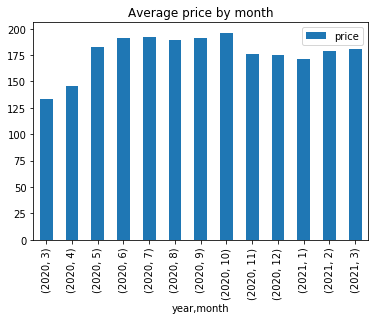

In [49]:
# Plot the average price by month
df_cal_clean['year'] = pd.DatetimeIndex(df_cal_clean['date']).year
df_cal_clean['month'] = pd.DatetimeIndex(df_cal_clean['date']).month
# In order to average price, we will be converting it to float and removing the $ sign
#df_cal_clean['price'] = df_cal_clean['price'].replace('[\$,]', '', regex=True).astype(float)
df_cal_clean.groupby(['year','month'])[['price']].mean().plot(kind="bar", title= "Average price by month");

*Insight*: Based on this graph, the highest price comes in month 10, or October.

## Question #3: What characteristics do higher priced homes have?

In [50]:
top_price = df_listings_clean.sort_values(by=['price', 'id'], ascending=True).tail(250)

In [51]:
top_price.describe()

,id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,accommodates,bathrooms,bedrooms,beds,...,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,instant_bookable,reviews_per_month
count,2.500000e+02,226.000000,226.000000,250.000000,250.0,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.0,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,178.000000,250.000000,181.000000
mean,3.173883e+07,1.000000,97.831858,0.312000,1.0,0.368000,8.380000,2.636000,3.400000,5.008000,...,1.0,21.180000,42.804000,64.156000,256.060000,15.612000,9.912000,94.516854,0.576000,2.013757
std,9.880225e+06,0.326599,7.893629,0.464239,0.0,0.483229,5.415618,2.051423,2.811337,5.578208,...,0.0,10.629371,19.215058,28.284052,116.425616,31.202626,21.086937,8.140174,0.495182,4.610248
min,6.992840e+05,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.030000
25%,2.632554e+07,1.000000,98.250000,0.000000,1.0,0.000000,4.000000,1.125000,2.000000,2.000000,...,1.0,16.000000,34.250000,54.250000,179.000000,0.000000,0.000000,92.000000,0.000000,0.420000
50%,3.433598e+07,1.000000,100.000000,0.000000,1.0,0.000000,6.000000,2.000000,3.000000,3.000000,...,1.0,26.000000,50.000000,73.000000,311.000000,3.000000,3.000000,98.000000,1.000000,0.930000
75%,3.888884e+07,1.000000,100.000000,1.000000,1.0,1.000000,12.000000,3.000000,4.000000,6.000000,...,1.0,29.000000,58.000000,87.750000,340.000000,18.750000,10.000000,100.000000,1.000000,2.310000
max,4.294167e+07,3.000000,100.000000,1.000000,1.0,1.000000,37.000000,21.000000,24.000000,50.000000,...,1.0,30.000000,60.000000,90.000000,365.000000,273.000000,224.000000,100.000000,1.000000,46.670000


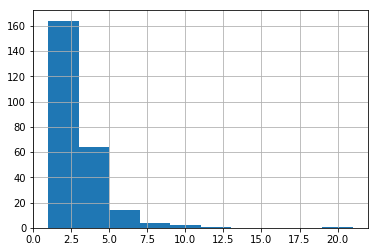

In [93]:
top_price["bathrooms"].hist()

These homes seem to have up to 12.5 bathrooms and is right skewed.

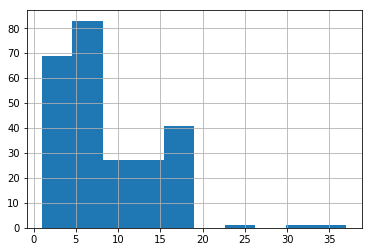

In [107]:
#graph histogram for distribution of accommodates column
top_price["accommodates"].hist();


The majority of high priced homes have at least 5 people they accomodate, while cheaper homes accommodate less than 5  guests.

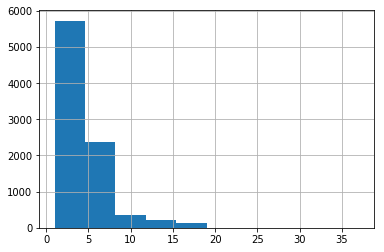

In [108]:
#compare top price distribution to all listings
df_listings_clean["accommodates"].hist();

# Which neighborhoods have higher prices?

In [52]:
#display total number of neighborhoods
df_listings_clean['neighbourhood_cleansed'].nunique()

77

Since there are too many neighbourhoods, we will only show the top 10.

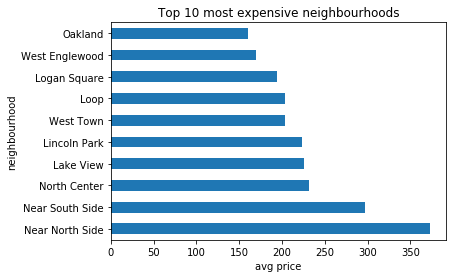

In [53]:
#Group average price by neighborhoods
(df_listings_clean.groupby('neighbourhood_cleansed')['price'].mean().sort_values(ascending=False).head(10)).plot(kind='barh');
plt.xlabel("avg price");
plt.ylabel("neighbourhood");
plt.title("Top 10 most expensive neighbourhoods");

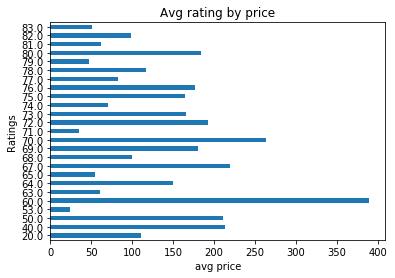

In [54]:
#Group ratings by price
(df_listings_clean.groupby('review_scores_rating')['price'].mean().head(25)).plot(kind='barh');
plt.xlabel("avg price");
plt.ylabel("Ratings");
plt.title("Avg rating by price");

In [55]:
#select data to use for plots
apts = df_listings_clean.loc[df_listings_clean['price'] < 500]

Text(0.5, 1.0, 'Distribution of Price and Rating')

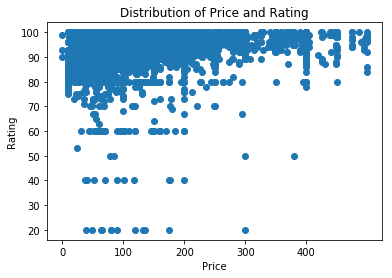

In [56]:
plt.scatter(data= apts, x='price', y='review_scores_rating');
plt.xticks((np.arange(0, 500, step=100)));
plt.xlabel("Price");
plt.ylabel("Rating");
plt.title("Distribution of Price and Rating")

This graph shows us that the majority of the good reviews are actually from rentals that cost less than $200. That could also mean these are the units that are being rented out the most.

# Modeling

I will now use a Random Forest Regressor to see what rental characteristics influence price.

In [57]:
df_listings_clean['is_business_travel_ready'].dtype

dtype('O')

In [58]:
#clean up column that was shown as object
df_listings_clean['is_business_travel_ready'] = df_listings_clean['is_business_travel_ready'].astype(int)

In [59]:
df_listings_clean['is_business_travel_ready'].dtype

dtype('int64')

In [60]:
modeling_feats = ['host_response_time','host_response_rate','host_is_superhost', 
                  'host_identity_verified',
                  'accommodates','bathrooms', 'bedrooms', 'beds','price','cleaning_fee',
                  'minimum_nights','maximum_nights','availability_30', 'availability_60', 'availability_90', 'availability_365', 
                  'number_of_reviews','review_scores_rating', 'instant_bookable',
                  'cancellation_policy','reviews_per_month']

In [61]:
df_model = df_listings_clean[modeling_feats]
df_model.head()

,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,...,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,1.0,100.0,0.0,1.0,2,1.0,0.0,1.0,48,0.0,...,60,13,43,65,65,3,90.0,0,0,0.05
1,1.0,100.0,1.0,1.0,1,1.0,1.0,1.0,55,20.0,...,90,27,55,83,324,178,100.0,0,1,2.81
2,1.0,100.0,1.0,1.0,7,1.0,3.0,4.0,117,30.0,...,60,8,37,62,175,394,96.0,1,0,2.93
3,1.0,100.0,1.0,0.0,2,1.0,1.0,1.0,80,0.0,...,60,29,59,85,335,383,93.0,0,0,2.94
4,0.0,91.0,0.0,1.0,4,1.0,1.0,0.0,150,85.0,...,180,19,49,74,337,49,92.0,1,1,0.68


In [62]:
df_model.dropna(inplace=True)

/Users/dh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [63]:
# Split the data into features and target label
target= df_model['price']
features_raw = df_model.drop('price', axis = 1)

In [64]:

features_log_transformed = pd.DataFrame(data = features_raw)

In [65]:
numerical_feats = ['host_response_time', 'host_response_rate','host_is_superhost','host_identity_verified', 
                    'accommodates', 'bathrooms', 'bedrooms', 
                   'beds', 'cleaning_fee', 'minimum_nights', 'availability_30', 'availability_60', 
                   'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 
                   'instant_bookable', 'cancellation_policy', 'reviews_per_month']

In [66]:
## Normalizing numerical features
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() 
numerical = numerical_feats

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

/Users/dh/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,host_response_time,host_response_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,cleaning_fee,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,0.333333,1.00,0.0,1.0,0.027778,0.090909,0.000000,0.03125,0.000000,0.074176,60,0.433333,0.716667,0.722222,0.178082,0.003226,0.8750,0.0,0.00,0.001188
1,0.333333,1.00,1.0,1.0,0.000000,0.090909,0.083333,0.03125,0.036364,0.002747,90,0.900000,0.916667,0.922222,0.887671,0.285484,1.0000,0.0,0.25,0.110451
2,0.333333,1.00,1.0,1.0,0.166667,0.090909,0.250000,0.12500,0.054545,0.002747,60,0.266667,0.616667,0.688889,0.479452,0.633871,0.9500,1.0,0.00,0.115202
3,0.333333,1.00,1.0,0.0,0.027778,0.090909,0.083333,0.03125,0.000000,0.002747,60,0.966667,0.983333,0.944444,0.917808,0.616129,0.9125,0.0,0.00,0.115598
4,0.000000,0.91,0.0,1.0,0.083333,0.090909,0.083333,0.00000,0.154545,0.008242,180,0.633333,0.816667,0.822222,0.923288,0.077419,0.9000,1.0,0.25,0.026128


In [67]:
# TODO: One-hot encode features
features_final = pd.get_dummies(features_log_minmax_transform)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

20 total features after one-hot encoding.


In [68]:

# Split datasets into training and testing
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show number of samples
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5014 samples.
Testing set has 1254 samples.


In [69]:
feats= features_final.columns

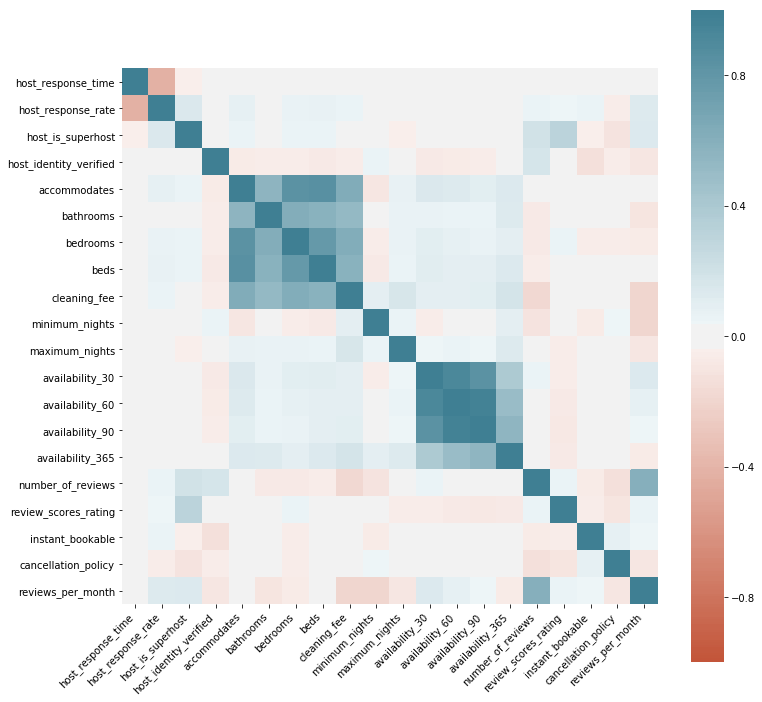

In [70]:
## Plot correlation matrix

plt.figure(figsize=(12,12))
ax = sns.heatmap(X_train[feats].corr(), vmin=-1, vmax=1, center=0,
                 cmap=sns.diverging_palette(20, 220, n=200),
                 square=True)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [71]:
# calculate correlation between significant features 

correlated_features = X_train[feats].corr().abs().unstack().sort_values(ascending=False)
correlated_features = correlated_features.reset_index(name='correlation').rename({'level_0': 'feature_1', 'level_1': 'feature_2'}, axis=1)
correlated_features = correlated_features[correlated_features['feature_1'] != correlated_features['feature_2']] # remove duplicate pairs
correlated_features.sort_values('correlation', ascending=False).head()

,feature_1,feature_2,correlation
20,availability_90,availability_60,0.961362
21,availability_60,availability_90,0.961362
22,availability_60,availability_30,0.921980
23,availability_30,availability_60,0.921980
24,accommodates,beds,0.851916


In [72]:
# keep features that are significant/not highly correlated

feats_final = list()
threshold = 0.5

for new_feature in feats:
    if (correlated_features.loc[(correlated_features['feature_1'] == new_feature) & (correlated_features['feature_2'].isin(feats_final)), 'correlation'].abs() < threshold).all():
        feats_final.append(new_feature)
#feats_final

In [73]:
features_final = features_final[feats_final] ## Select only features that aren't too correlated

In [74]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5014 samples.
Testing set has 1254 samples.


In [75]:
#use Random Forest Regressor with 500 estimators
ForestRegressor = RandomForestRegressor(n_estimators=500)

#fit and train the model
ForestRegressor.fit(X_train, y_train)
y_test_preds = ForestRegressor.predict(X_test)


# Evaluation

In [76]:
#print out model results
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))
print(median_absolute_error(y_test, y_test_preds))

0.24145731020135985
106364.94044178659
35.55583333333334


In [77]:
#create dataframe with model coefficients
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = ForestRegressor.feature_importances_
coefs_df.sort_values('coefs', ascending=True).head(5)

,est_int,coefs
0,host_response_time,0.009820
3,host_identity_verified,0.010884
2,host_is_superhost,0.018563
11,instant_bookable,0.023455
5,minimum_nights,0.040348


In [78]:
coefs_df.index = coefs_df.est_int
coefs_df.shape

(13, 2)

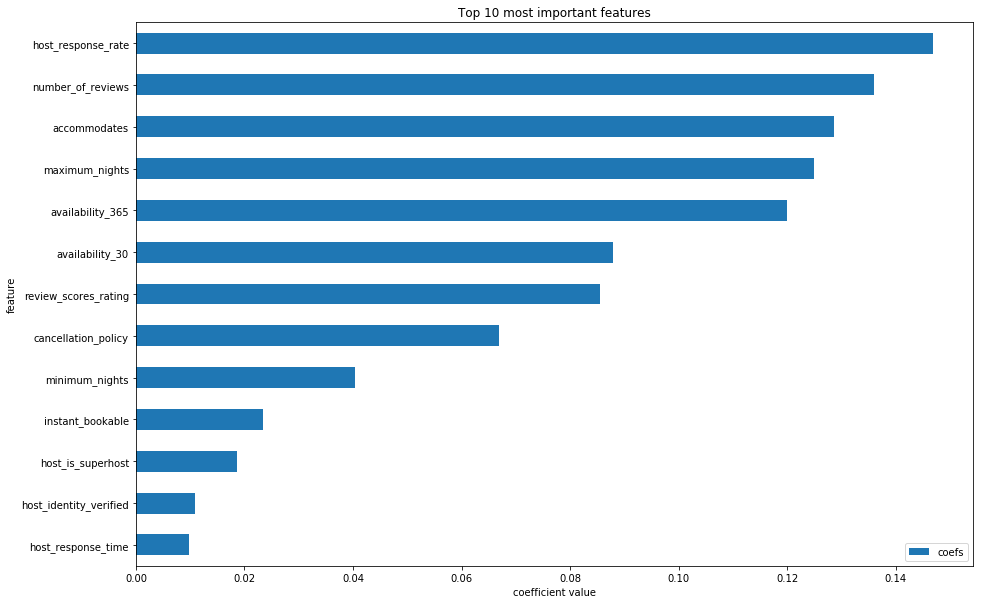

In [97]:
#print out the top 20 coefficients
ax= coefs_df.sort_values('coefs', ascending=True).head(20).plot(kind = 'barh',figsize = (15,10), title="Top 10 most important features");
ax.set_xlabel("coefficient value");
ax.set_ylabel("feature");

# Results

The results of the most important factors in determining price were very expected. If a listing has more reviews, more people will choose to stay there since they can read more about it based on a number of other people who have stayed there. They will be able to see prior guests' experiences and will be more comfortable booking. Thus, demand for this rental will go up, causing the price of the rental to increase as well. Also, if a host is likely to reply more frequently, they are more invested in their rental and can keep up with demand. The third most important factor is how many people a rental accomadates. This is very important since the more people staying at the rental, the higher the price it will be since it requires more rooms.

